In [1]:
import numpy as np
from scipy import special
from scipy import linalg
from matplotlib import pyplot as plt

# Задача 1


Реализовать генератор матрциц, который должен поддерживать функции:
* 1) Генерация абсолютно случайной матрицы $n\times m$
* 2) Генерация случайной диагональной матрицы $n\times n$
* 3) Генерация случайной верхнетреугольной матрицы
* 4) Генерация случайной нижнетреугольной матрицы
* 5) Генерация симметричной матрицы
* 6) Генерация вырожденной матрицы
* 7) Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* 8) Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$

Оценить вероятность того, что созданная матрица будет вырожденной. 

Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).


In [5]:
LOWER = -10
UPPER = 10

In [48]:
# 1 
def rand_mat(m, n, minn = LOWER, maxx = UPPER):
    if n == 1:
        return np.random.uniform(minn, maxx, (m)) 
    return np.random.uniform(minn, maxx, (m, n))
    
# 2
def rand_diag(n, minn = LOWER, maxx = UPPER):
    d = np.random.uniform(minn, maxx, n)
    m = np.zeros((n,n))
    np.fill_diagonal(m, d)
    return m

# 3
def rand_upper_triang(n, minn = LOWER, maxx = UPPER):
    m = np.random.uniform(minn, maxx, (n,n))
    return np.triu(m) 

# 4
def rand_lower_triang(n, minn = LOWER, maxx = UPPER):
    m = np.random.uniform(minn, maxx, (n,n))
    return np.triu(m).T 

# 5
def rand_symm(n, minn = LOWER, maxx = UPPER):
    m = rand_upper_triang(minn, maxx, n)
    z = np.zeros((n,n))
    np.fill_diagonal(z, np.diag(m))  
    s = m + m.T - z
    return s

# 6
def rand_sing(m, n, minn = LOWER, maxx = UPPER):
    m = np.random.uniform(minn, maxx, (m, n))
    m[0] = m[1]
    return m

# 7
def rand_sing_echelon(n, rk, minn = LOWER, maxx = UPPER):
    m = rand_upper_triang(minn, maxx, n)
    m[rk:] = 0
    return m

# 8
def rand_epsilon(m, n, eps):
    if n == 1:
        return np.random.uniform(-eps, eps, (m)) 
    return np.random.uniform(-eps, eps, (m, n))

In [18]:
it = 10000
epsilon = 10e-2
dim = range(2, 10+1)
count = 0
prob_arr = []
err = []
for n in dim:
    for i in range(it):
        m = rand_mat(n, n)
        if np.abs(np.linalg.det(m)) < epsilon: 
            count += 1
    prob_arr.append(count/it)
    err.append(np.sqrt(count)/it)
    count = 0

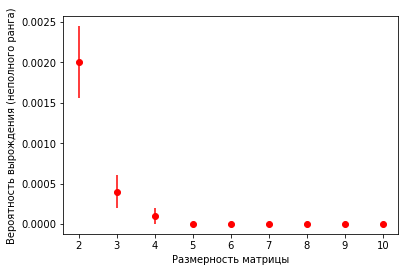

In [19]:
plt.errorbar(dim, prob_arr, yerr=err, c = 'r',fmt='o')
plt.xlabel('Размерность матрицы')
plt.ylabel('Вероятность вырождения (неполного ранга)')
plt.show()

# Задача 2


Используя ряд Маклорена, реализовать вычисление основных элементарных функций: 
* 1) Экспонента
* 2) Натуральный логарифм
* 3) Синус
* 4) Косинус
* 5) Тангенс
* 6) Котангенс
* 7) Арксинус
* 8) Арккосинус
* 9) Арктангенс
* 10) Гиперболический синус 
* 11) Гиперболический косинус
* 12) Гиперболический тангенс
* 13) Гиперболический арктангенс

Оценить величину машинного эпсилон. Предложить модификации для некоторых функций и сравнить полученные результаты.

In [76]:
# 1
def exp(x, mod = True):
    
    if not mod:
        val = 0
        term = 1
        n = 1
        while val != val + term:
            val += term
            term = term * x / n
            n += 1
        return val
    
    else:
        if x < 0:
            val = exp(-x, mod = False)
            return 1/val
        else:
            return exp(x, mod = False)

X = -15
print('X = ', X, '\nnumpy: e^X = ',np.exp(X),'\n')
print('без модификации: e^X = ', exp(X, mod=False), '\nмашинный эпсилон: ', abs(exp(X, mod=False) - np.exp(X)), '\n')
print('c модификацией: e^X = ', exp(X, mod=True), '\nмашинный эпсилон: ', abs(exp(X, mod=True) - np.exp(X)), '\n')

X =  -15 
numpy: e^X =  3.059023205018258e-07 

без модификации: e^X =  3.0590941973020066e-07 
машинный эпсилон:  7.099228374875669e-12 

c модификацией: e^X =  3.059023205018257e-07 
машинный эпсилон:  1.0587911840678754e-22 



In [77]:
# 2
def ln(x):
    term = x - 1
    val = term
    n = 2
    while val != val + term:
        term = - term * (x - 1) * (n - 1)/ n
        n += 1
        val += term
    return val

X = 1.9999
print('X = ', X, '\nnumpy:\nlnX = ',np.log(X),'\n')
print('my:\nlnX = ', ln(X), '\nмашинный эпсилон: ', abs(ln(X) - np.log(X)), '\n')

X =  1.9999 
numpy:
lnX =  0.6930971793099037 

my:
lnX =  0.6930971793098952 
машинный эпсилон:  8.43769498715119e-15 



In [81]:
# 3
def sin(x, mod = True):
    if not mod:
        term = x 
        val = term
        n = 1
        while val != val + term:
            n += 2
            term = - term * x * x / (n - 1) /n
            val += term
        return val
    else:
        x = x % (2 * np.pi)
        return sin(x, mod = False)

X = 10 * 3.1415926
print('X = ', X, '\nnumpy:\nsinX = ',np.sin(X),'\n')
print('my (unmodified):\nsinX = ', sin(X, mod = False), '\nмашинный эпсилон: ', abs(sin(X, mod = False) - np.sin(X)), '\n')
print('my (modified):\nsinX = ', sin(X), '\nмашинный эпсилон: ', abs(sin(X) - np.sin(X)), '\n')

X =  31.415926 
numpy:
sinX =  -5.35897933476904e-07 

my (unmodified):
sinX =  -6.538335492923462e-05 
машинный эпсилон:  6.484745699575772e-05 

my (modified):
sinX =  -5.358979291420759e-07 
машинный эпсилон:  4.334828009273982e-15 



# Задача 3

Реализовать вычисление трех основных норм векторов (L1, L2 и кубическую) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy.

In [41]:
def L2(A):
    if A.ndim == 1:
        return np.sum(A**2)**0.5
    return (np.amax(np.linalg.eigvals(A.T @ A)))**0.5

def L1(A):
    return np.amax(np.sum(np.abs(A), axis=0))

def Linfty(A):
    A = np.abs(A)
    return np.amax(np.sum(A, axis=1))
def cond(A):
    return L2(A)*L2(np.linalg.inv(A))

# Задача 4

Реализовать метод Гаусса приведения матрицы к ступенчатому виду. Реализовать функцию вычисления ранга матрицы. Сгенерировать вырожденные матрицы различных рангов и размеров и проверить алгоритм.

In [252]:
def ForwardGauss(M, rank = False):
    M = np.array(M, dtype='float')
    n, m = M.shape
    col = 0
    cork = 0
    for i in range(m):
        
        ind = col + np.argmax(np.abs(M.T[col + cork][col:]))
    
        if M.T[col + cork][ind] != 0:
            M[col], M[ind] = M[ind], M[col]
        else:
            cork += 1
            continue

        for j in range(col + 1, n):
            M[j] -=  M[col] / M[col, i] * M[j, i]
        col += 1
    if rank:
        rk = n - cork
        return M, rk
    else:
        return M
    
def rank(M):
    return ForwardGauss(M, rank = True)[1]

In [271]:
# N = np.array(
#     [[2, 2, 4],
#      [0, 0 ,1],
#      [2, 2, 10]]);
# M = np.array(
#     [[1, 2, 4],
#      [4, 0 ,1],
#      [5, 2, 10]]);
K = rand_mat(0, 10, 5, 5)
print(K,'\n')

print(linalg.lu(K)[2], '\n')

K, rk = ForwardGauss(K, rank = True)
print(K,'\n', rk )

[[4.49557485 4.64845697 3.47285425 9.43405312 8.94133476]
 [8.13406076 6.91323029 3.32976887 9.6787222  9.88480381]
 [8.13581674 9.03904536 8.76548117 5.43564185 8.37442321]
 [7.65576033 4.84041561 3.13553056 3.58682473 3.06230467]
 [1.02440458 7.68513763 0.76786083 4.90645062 0.24943293]] 

[[ 8.13581674  9.03904536  8.76548117  5.43564185  8.37442321]
 [ 0.          6.54700488 -0.33582665  4.22203298 -0.8050153 ]
 [ 0.          0.         -5.54276339  5.6138912   1.25103918]
 [ 0.          0.          0.          5.24754019  3.95797058]
 [ 0.          0.          0.          0.         -3.0459061 ]] 

[[ 8.13581674  9.03904536  8.76548117  5.43564185  8.37442321]
 [ 0.          6.54700488 -0.33582665  4.22203298 -0.8050153 ]
 [ 0.          0.         -5.30074999  0.83557939 -5.26866319]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]] 
 3


In [23]:
# Пусть пока
def ForwardGaussHelp(M):
    return linalg.lu(M)[2]

def RankHelp(M):
    return np.linalg.matrix_rank(M)

# Задача 5

Реализовать метод Гаусса решения СЛАУ. Использовать данный метод для решения систем различных размеров. Оценить скорость работы метода Гаусса (необходимое количество операций) в зависимости от размера системы. 

In [24]:
def Gauss(M, y):
    
    A = np.array(M, dtype='float')
    y = np.array(y, dtype='float')
    
    n = A.shape[0]
    x = np.zeros(n)
    y = y.reshape(n, 1)
    
    if RankHelp(M) < n:
        print('Система имеет бесконечное количество решений')
        return
    
    My = np.concatenate((M, y), axis=1)
    My = ForwardGaussHelp(My)
    for i in range(n - 1, -1, -1):
        tmp = 0.0
        for j in range(i + 1, n):
            tmp += x[j] * My[i, j]
        x[i] = (My[i, n] - tmp) / My[i, i]
    return x

In [25]:
B = np.array([
    [1, 3, 1],
    [0, 2, 0],
    [0, 0, 1]
])
f = [2, 1, 1]
Gauss(B, f)

array([-0.5,  0.5,  1. ])

# Задача 6

Сгенерировать СЛАУ (размер матрицы должен быть не менее $50\times 50$). Решить СЛАУ методом Гаусса для различных возмущений столбца свободных членов. Оценить число обусловленности, используя полученные результаты. Вычислить число обусловленности и сравнить с численными оценками.

In [62]:
N = 50
A = rand_mat(N, N)
b = rand_mat(N, 1)
x = Gauss(A, b)

nx = L2(x)
nb = L2(b)
x_error = []
b_error = []

for i in range(10000):
    db = rand_epsilon(N, 1, 10e-1)
    xn = Gauss(A, b + db)
    dx = xn - x
    x_error.append(L2(dx)/nx)
    b_error.append(L2(db)/nb)

cn = np.max(np.array(x_error) / np.array(b_error))
print("Condition numbers: \nestimation = {}, \nformula = {}".format(cn, cond(A)))

print(L2(A), L2(np.linalg.inv(A)))

Condition numbers: 
estimation = 10.872567578366032, 
formula = 313.2267134612223
77.84278594252979 4.02383740084114


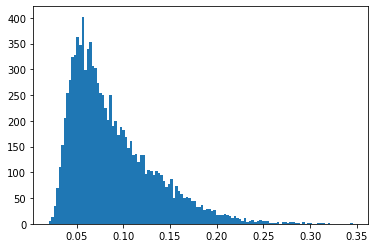

In [63]:
plt.hist(errx, bins = 120)
plt.show()